# Pymaceuticals Inc.
---

### Analysis

- After looking at the summary statistics for each drug regimen, it is apparent that Capomulin and Ramicane drugs are performing well at reducing the tumor size on average.

- Looking at the bar charts showing the total number of time points for all mice tested for each drug regimen, we see more mice with time points in the Capomulin and Ramicane drug regimen. The bar chart could imply that the mice for the other drug regimen did not survive the whole duration of the treatment or that the data was not recorded properly. We must do further analysis of the data to determine these inferences.

- The pie chart indicates that the data population has more male mice compared to female mice by approximately a 1% difference.

- The box plot in our analysis shows that Capomulin and Ramicane drugs have a smaller final tumor volume than the Infubinol and Ceftamin drugs.

- Looking at the tumor volume of mouse l509 and plotting it against time, we see that the Capomulin treatment is reducing the tumor's size as intended.

- Creating a scatter plot that compares the weight in grams and average tumor volume of mice, we see a positive correlation between the two variables. The scatter plot makes sense because the bigger the tumor, the more a mouse should weigh. 
 

In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata.head()
merged = pd.merge(study_results,mouse_metadata, how= "left", on= 'Mouse ID')

# # Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
merged["Mouse ID"].nunique()

249

In [252]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged[merged.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
merged.query("`Mouse ID` == 'g989'")

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = merged[~merged['Mouse ID'].isin(['g989'])]
cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice in the clean DataFrame.
cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = cleaned[["Tumor Volume (mm3)", "Drug Regimen"]].groupby('Drug Regimen').mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
tumor_median = cleaned[["Tumor Volume (mm3)", "Drug Regimen"]].groupby('Drug Regimen').median()["Tumor Volume (mm3)"].rename("Median Tumor Volume")
tumor_variance = cleaned[["Tumor Volume (mm3)", "Drug Regimen"]].groupby('Drug Regimen').var()["Tumor Volume (mm3)"].rename("Tumor Volume Variance")
tumor_std_dev = cleaned[["Tumor Volume (mm3)", "Drug Regimen"]].groupby('Drug Regimen').std()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Dev.")
tumor_std_err = cleaned[["Tumor Volume (mm3)", "Drug Regimen"]].groupby('Drug Regimen').sem()["Tumor Volume (mm3)"].rename("Tumor Volume Std. Err.")
summary_stats = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_std_dev, tumor_std_err], axis = 1)
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = cleaned.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

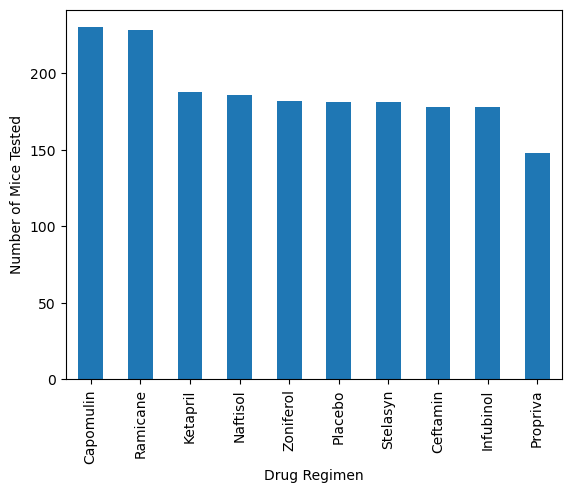

In [256]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

df_bar = cleaned[["Mouse ID", "Drug Regimen"]].groupby('Drug Regimen').count().sort_values("Mouse ID", ascending = False)
df_bar.plot(y = 'Mouse ID', kind = 'bar', ylabel = "Number of Mice Tested", legend = False)

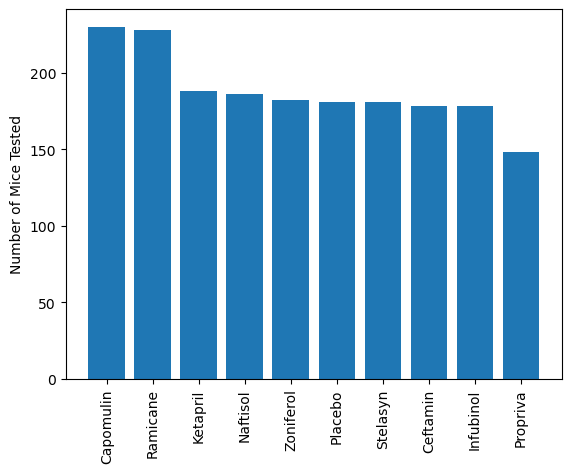

In [137]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(df.index, df_bar["Mouse ID"])
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

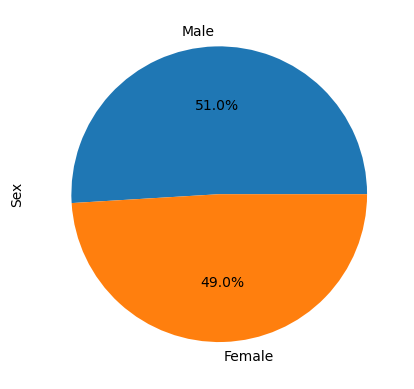

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_pie = cleaned[["Mouse ID", "Sex"]].groupby('Sex').count().sort_values("Sex", ascending = False)
df_pie.plot(y ='Mouse ID', kind = "pie", autopct="%1.1f%%", ylabel =  "Sex", legend = False)

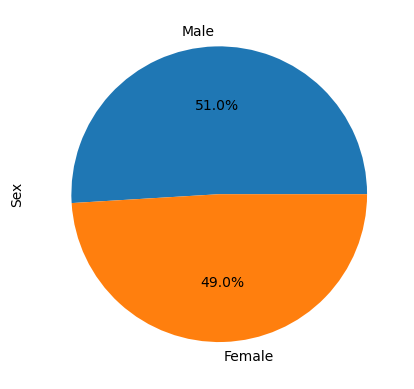

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_pie["Mouse ID"], labels = df_pie.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = cleaned[["Mouse ID","Timepoint"]].groupby("Mouse ID").max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = cleaned.merge(greatest, on = ["Mouse ID", "Timepoint"], how = "inner", sort = True)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [193]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = list()

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows  = df[df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol.append(rows.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = rows[(rows.iloc[:] >  upper_bound) | ((rows.iloc[:] <  lower_bound))]
    print(f"{treatment}'s  potential outliers: {outliers}'")

Capomulin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Ramicane's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'
Infubinol's  potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64'
Ceftamin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)'


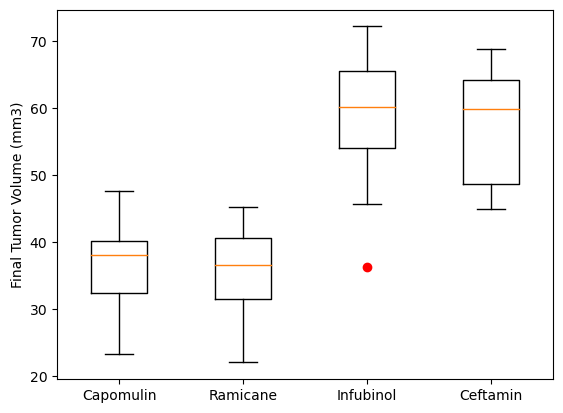

In [197]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = treatments, sym = 'r')
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

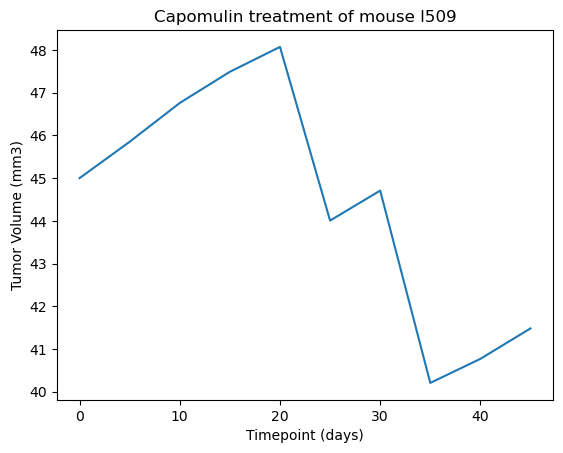

In [207]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = cleaned.query("`Mouse ID` == 'l509'")
mouse_l509.plot(x = "Timepoint", y = "Tumor Volume (mm3)", kind = "line", legend = False, xlabel = "Timepoint (days)",
               ylabel = "Tumor Volume (mm3)", title = "Capomulin treatment of mouse l509")
plt.show()

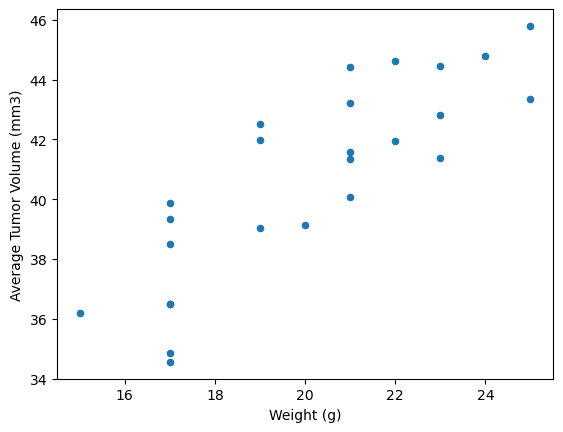

In [241]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_scatter = cleaned.query("`Drug Regimen` == 'Capomulin'")
df_scatter = df_scatter.groupby("Mouse ID").mean()
df_scatter.plot(x = "Weight (g)", y = "Tumor Volume (mm3)",kind = "scatter", xlabel = "Weight (g)",
                ylabel = "Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


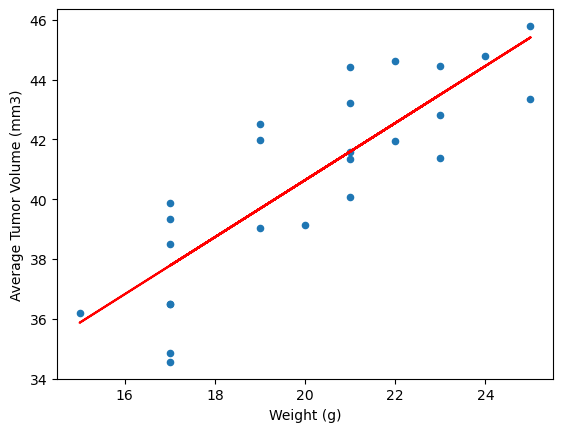

In [249]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = df_scatter.corr().loc["Weight (g)", "Tumor Volume (mm3)"]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")
df_scatter.plot(x = "Weight (g)", y = "Tumor Volume (mm3)",kind = "scatter", xlabel = "Weight (g)",
                ylabel = "Average Tumor Volume (mm3)")
d_slope, d_int, d_r, d_p, d_std_err = st.linregress(df_scatter["Weight (g)"], df_scatter["Tumor Volume (mm3)"])
d_line = d_slope * df_scatter["Weight (g)"] + d_int
plt.plot(df_scatter["Weight (g)"], d_line, color = 'red')
plt.show()